<a href="https://colab.research.google.com/github/namozhdehi/KSR/blob/main/Linear_Regression_NYC_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - NYC Taxi

In this assignment, we are providing you the NYC-trip duration dataset.
At some point or the other almost each one of us has used an Ola or Uber for taking a ride.
Ride hailing services are services that use online-enabled platforms to connect between passengers and local drivers using their personal vehicles. In most cases they are a comfortable method for door-to-door transport. Usually they are cheaper than using licensed taxicabs. Examples of ride hailing services include Uber and Lyft.



To improve the efficiency of taxi dispatching systems for such services, it is important to be able to predict how long a driver will have his taxi occupied. If a dispatcher knew approximately when a taxi driver would be ending their current ride, they would be better able to identify which driver to assign to each pickup request.


### Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

In [42]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [43]:
# Convert 'store_and_fwd_flag' binary column to 0 and 1
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

In [44]:
# Convert 'pickup_datetime' to datetime format and extract features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['pickup_datetime'].dt.month

In [45]:
# Drop unnecessary columns
x = df.drop(['id', 'trip_duration', 'pickup_datetime', 'dropoff_datetime'], axis=1)
y = df['trip_duration']

### Segregating variables: Independent and Dependent Variables

In [46]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Normalising using *min_max_scaler*

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
cols = train_x.columns
cols

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_hour', 'pickup_dayofweek', 'pickup_month'],
      dtype='object')

In [49]:
numerical_features = train_x.select_dtypes(include=['number']).columns
train_x_scaled = scaler.fit_transform(train_x[numerical_features])
train_x_scaled = pd.DataFrame(train_x_scaled, columns=numerical_features)
train_x_scaled.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_dayofweek,pickup_month
0,1.0,0.166667,0.855638,0.350647,0.855696,0.729908,0.0,0.826087,0.833333,0.4
1,1.0,0.833333,0.855101,0.349279,0.855266,0.726930,0.0,0.565217,0.000000,0.0
2,0.0,0.333333,0.855974,0.351998,0.855763,0.728982,0.0,0.826087,1.000000,0.6
3,0.0,0.333333,0.855650,0.352067,0.855742,0.730152,0.0,1.000000,0.833333,0.2
4,1.0,0.833333,0.855284,0.351071,0.855595,0.730634,0.0,0.043478,0.166667,0.6


### Implementing Logistic Regression

In [50]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LinearRegression as LinearRegression
from sklearn.metrics import f1_score

In [51]:
# Creating instance of Logistic Regresssion
LinReg = LinearRegression()

# Fitting the model
LinReg.fit(train_x_scaled, train_y)

LinearRegression()

In [52]:
# Predicting over the Train
train_predict = LinReg.predict(train_x_scaled)
train_predict

array([1062.39089305, 1198.33588539,  872.99869729, ..., 1108.14053164,
       1022.66728667,  756.63014582])

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating regression metrics
mse = mean_squared_error(train_y, train_predict)
r2 = r2_score(train_y, train_predict)

print('Training Mean Squared Error:', mse)
print('Training R-squared:', r2)

Training Mean Squared Error: 16670950.967939083
Training R-squared: 0.003449367123027791


### Plotting the Coefficients


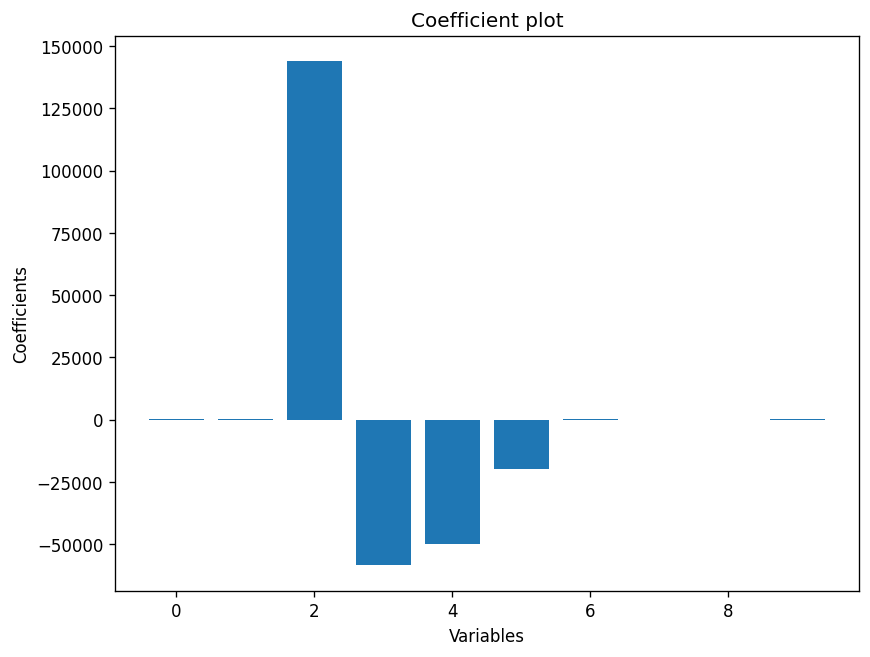

In [54]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x_scaled.columns))
c = LinReg.coef_.reshape(-1)
plt.bar(x, c)
plt.xlabel("Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')
plt.show()